In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from IPython.display import Image
import seaborn as sns
import string
%matplotlib inline


In [2]:
#Store data
url = "https://raw.githubusercontent.com/Snow31ind/mini-project/dataset/datasets/VNINDEX_2010-2022.csv"
df = pd.read_csv(url)
#Show data
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2021","1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
1,"Dec 30, 2021","1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2,"Dec 29, 2021","1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
3,"Dec 28, 2021","1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
4,"Dec 27, 2021","1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%
...,...,...,...,...,...,...,...
2990,"Jan 08, 2010",520.90,540.95,544.49,520.90,84.72K,-2.33%
2991,"Jan 07, 2010",533.34,536.78,540.77,530.68,75.68K,-0.21%
2992,"Jan 06, 2010",534.46,529.47,538.84,526.37,67.36K,0.36%
2993,"Jan 05, 2010",532.53,529.23,539.39,529.23,70.05K,2.99%


In [3]:
#Change colume names
col_names = ['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'pChange']
df.columns = col_names
#reverse row order and reset index
df = df.loc[::-1].reset_index(drop = True)
#remove % and convert string to int
for line in range(0, len(df.index)):
    df['pChange'][line] = float(df['pChange'][line][:-1])
    df['Price'][line] = float(df['Price'][line].replace(',', ''))
    df['Open'][line] = float(df['Open'][line].replace(',', ''))
    df['High'][line] = float(df['High'][line].replace(',', ''))
    df['Low'][line] = float(df['Low'][line].replace(',', ''))
    df['Volume'][line] = (df['Volume'][line].replace('.', ''))
    df['Volume'][line] = (df['Volume'][line].replace('K', '0'))
    df['Volume'][line] = (df['Volume'][line].replace('.', ''))
    df['Volume'][line] = (df['Volume'][line].replace('M', '0000'))
    df['Volume'][line] = int(df['Volume'][line])
#show data
df

,Date,Price,Open,High,Low,Volume,pChange
0,"Jan 04, 2010",517.05,501.74,517.05,501.74,44920,4.5
1,"Jan 05, 2010",532.53,529.23,539.39,529.23,70050,2.99
2,"Jan 06, 2010",534.46,529.47,538.84,526.37,67360,0.36
3,"Jan 07, 2010",533.34,536.78,540.77,530.68,75680,-0.21
4,"Jan 08, 2010",520.9,540.95,544.49,520.9,84720,-2.33
...,...,...,...,...,...,...,...
2990,"Dec 27, 2021",1488.88,1477.03,1490.12,1469.91,752110,0.8
2991,"Dec 28, 2021",1494.39,1488.88,1499.77,1483.97,1000000,0.37
2992,"Dec 29, 2021",1485.82,1494.39,1498.91,1485.82,843880,-0.57
2993,"Dec 30, 2021",1485.97,1490.96,1493.38,1484.82,747860,0.01


In [4]:
#convert colume datatype and store in train dataset
df_train = df
df_days = df_train.loc[:,'Date'] 
days = list()
for day in df_days:
    days.append(int((day.split(' ')[1]).split(',')[0]))

for idx in range(0, len(df.index)):
    df_train['Date'][idx] = int(days[idx])
    var = float(df_train['pChange'][idx])
    if var > 0:
        df_train['pChange'][idx] = "Rise"
    else:
        df_train['pChange'][idx] = "Fall"

df_train

,Date,Price,Open,High,Low,Volume,pChange
0,4,517.05,501.74,517.05,501.74,44920,Rise
1,5,532.53,529.23,539.39,529.23,70050,Rise
2,6,534.46,529.47,538.84,526.37,67360,Rise
3,7,533.34,536.78,540.77,530.68,75680,Fall
4,8,520.9,540.95,544.49,520.9,84720,Fall
...,...,...,...,...,...,...,...
2990,27,1488.88,1477.03,1490.12,1469.91,752110,Rise
2991,28,1494.39,1488.88,1499.77,1483.97,1000000,Rise
2992,29,1485.82,1494.39,1498.91,1485.82,843880,Fall
2993,30,1485.97,1490.96,1493.38,1484.82,747860,Rise


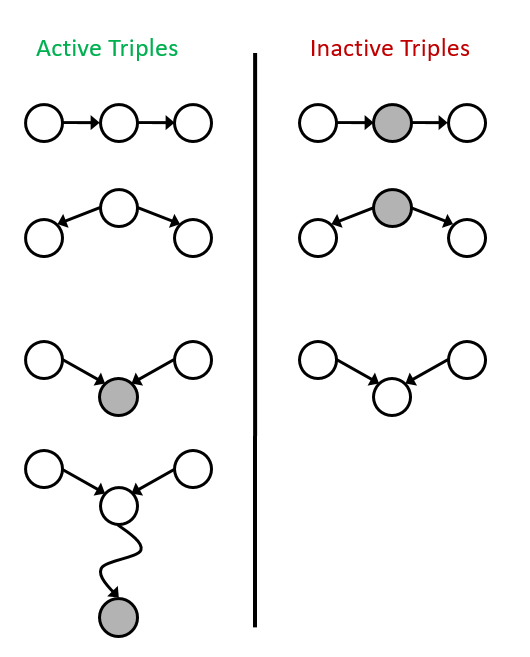

In [5]:
Image('active_inactive_triples.png', width = 400,height = 480)

In [6]:
#Find largest, smallest differences between High, Low and Open and the 
maxOHDifference = (df_train['High'][0]  / df_train['Open'][0]) * 100 - 100
minOHDifference = (df_train['High'][0] / df_train['Open'][0]) * 100 - 100
meanOHDifference = 0.0

maxOLDifference = (df_train['Open'][0] / df_train['Low'][0]) * 100 - 100
minOLDifference = (df_train['Open'][0] / df_train['Low'][0]) * 100 - 100
meanOLDifference = 0.0

maxTimes = df_train['Volume'][idx] / df_train['Open'][0]
minTimes = df_train['Volume'][idx] / df_train['Open'][0]
meanTimes = 0.0

OHList = list()
OHList.append(maxOHDifference)
OLList = list()
OLList.append(maxOLDifference)
TimesList = list()
TimesList.append(maxTimes)

for idx in range(1, len(df.index)):
    curOHDiff = (df_train['High'][idx]  / df_train['Open'][idx]) * 100 - 100
    OHList.append(curOHDiff)
    meanOHDifference += (df_train['High'][idx] / df_train['Open'][idx]) * 100 - 100

    curOLDiff = (df_train['Open'][idx] / df_train['Low'][idx]) * 100 - 100
    OLList.append(curOLDiff)
    meanOLDifference += (df_train['Open'][idx] / df_train['Low'][idx]) * 100 - 100

    curTimes = df_train['Volume'][idx] / df_train['Open'][idx]
    TimesList.append(curTimes)
    meanTimes += df_train['Volume'][idx] / df_train['Open'][idx]

    if curOHDiff > maxOHDifference:
        maxOHDifference = curOHDiff
        
    if curOLDiff > maxOLDifference:
        maxOLDifference = curOLDiff
    if curTimes > maxTimes:
        maxTimes = curTimes
        timesindex = idx

    if curOHDiff < minOHDifference:
        minOHDifference = curOHDiff
    if curOLDiff < minOLDifference:
        minOLDifference = curOLDiff
    if curTimes < minTimes:
        minTimes = curTimes

meanOHDifference /= len(df.index)
meanOLDifference /= len(df.index)
meanTimes /= len(df.index)

print((round(maxOHDifference, 2),
round(minOHDifference,2),
round(meanOHDifference,2)),

(round(maxOLDifference,2),
round(minOLDifference,2),
round(meanOLDifference,2)), 

(int(maxTimes),
int(minTimes), 
int(meanTimes)))


(7.79, 0.0, 0.65) (6.51, 0.0, 0.66) (211572, 36, 528)


Divide Open-High difference into 9 classes:
0[0:0.2)
1[0.2:1)
2[1:2)
3[2:3)
4[3:4)
5[4:5)
6[5:7)
7[7:10)
8[10:n)

Divide Low-High difference into 9 classes:
0(-0.2:0]
1(-1:-0.2]
2(-2:-1]
3(-3:-2]
4(-4:-3]
5(-5:-4]
6(-7:-5]
7(-10:-7]
8(-n:-10]

Divide Volume into 6 classes:  
0(0:100]
1(100:150]
2(150:185]
3(185:230]
4(230:360]
5(360:n)


Then construct new database



In [7]:
new_col_names = ['Date', 'OH', 'OL', 'VTimes', 'pChange']
new_df = df_train
del new_df['Price']
del new_df['Volume']
new_df.columns = new_col_names



In [8]:
for idx in range (0, len(df.index)):
    curOH = float(OHList[idx])
    if curOH == 0:
        new_df['OH'][idx] = 0
    elif curOH > 0 and curOH < 0.1:
        new_df['OH'][idx] = 1
    elif curOH >= 0.1 and curOH < 0.2:
        new_df['OH'][idx] = 2
    elif curOH >= 0.2 and curOH < 0.3:
        new_df['OH'][idx] = 3
    elif curOH >= 0.3 and curOH < 0.45:
        new_df['OH'][idx] = 4
    elif curOH >= 0.45 and curOH < 0.6:
        new_df['OH'][idx] = 5
    elif curOH >= 0.6 and curOH < 0.8:
        new_df['OH'][idx] = 6
    elif curOH >= 0.8 and curOH < 1:
        new_df['OH'][idx] = 7
    elif curOH >= 1 and curOH < 1.5:
        new_df['OH'][idx] = 8
    else:
        new_df['OH'][idx] = 9


    curOL = float(OLList[idx])
    if curOL == 0:
        new_df['OL'][idx] = 0
    elif curOL > 0 and curOL < 0.1:
        new_df['OL'][idx] = 1
    elif curOL >= 0.1 and curOL < 0.2:
        new_df['OL'][idx] = 2
    elif curOL >= 0.2 and curOL < 0.3:
        new_df['OL'][idx] = 3
    elif curOL >= 0.3 and curOL < 0.45:
        new_df['OL'][idx] = 4
    elif curOL >= 0.45 and curOL < 0.6:
        new_df['OL'][idx] = 5
    elif curOL >= 0.6 and curOL < 0.8:
        new_df['OL'][idx] = 6
    elif curOL >= 0.8 and curOL < 1:
        new_df['OL'][idx] = 7
    elif curOL >= 1 and curOL < 1.5:
        new_df['OL'][idx] = 8
    else:
        new_df['OL'][idx] = 9
    

    curTimes = float(TimesList[idx])
    if curTimes > 0 and curTimes <= 100:
        new_df['VTimes'][idx] = 0
    elif curTimes > 100 and curTimes <= 150:
        new_df['VTimes'][idx] = 1
    elif curTimes > 150 and curTimes <= 185:
        new_df['VTimes'][idx] = 2
    elif curTimes > 185 and curTimes <= 230:
        new_df['VTimes'][idx] = 3
    elif curTimes > 230 and curTimes <= 360:
        new_df['VTimes'][idx] = 4
    else:
        new_df['VTimes'][idx] = 5
    """elif curTimes > 300 and curTimes <= 350:
        new_df['VTimes'][idx] = 5
    elif curTimes > 350 and curTimes <= 400:
        new_df['VTimes'][idx] = 6
    elif curTimes > 400 and curTimes <= 450:
        new_df['VTimes'][idx] = 7
    elif curTimes > 450 and curTimes <= 500:
        new_df['VTimes'][idx] = 8"""
    


In [9]:
new_df

,Date,OH,OL,VTimes,pChange
0,4,9,0,5,Rise
1,5,9,0,1,Rise
2,6,9,5,1,Rise
3,7,6,8,1,Fall
4,8,6,9,2,Fall
...,...,...,...,...,...
2990,27,7,5,5,Rise
2991,28,6,4,5,Rise
2992,29,4,5,5,Fall
2993,30,2,4,5,Rise


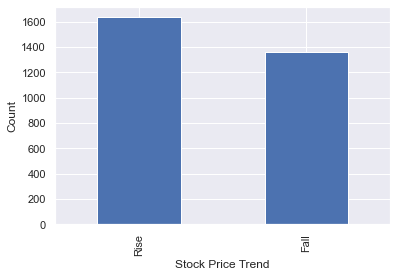

In [10]:
#visualize the number of elements in each class of pChange.
sns.set()
price_plot=df_train['pChange'].value_counts().plot(kind='bar')
plt.xlabel('Stock Price Trend')
plt.ylabel('Count')
plt.show()

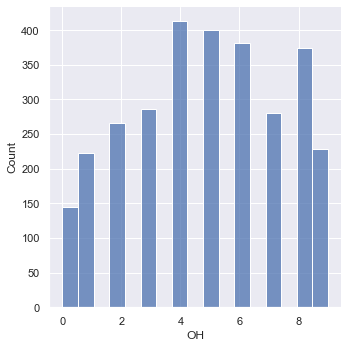

In [11]:
#Analyse some data features and see their distribution
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=new_df['OH'])
plt.show()

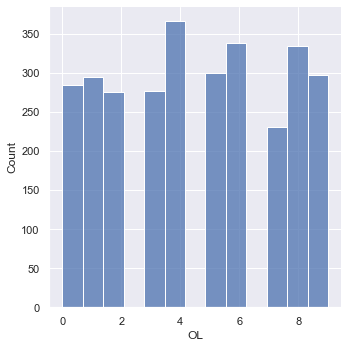

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=new_df['OL'])
plt.show()

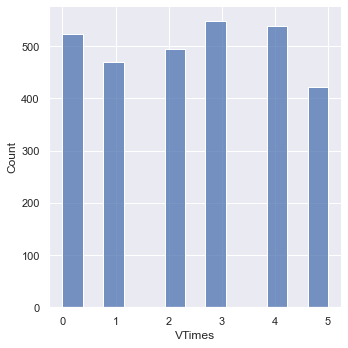

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=new_df['VTimes'])
plt.show()

In [14]:
X= new_df.drop(['pChange'], axis=1)
y=new_df['pChange']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=12)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [17]:
#Gaussian NB classifier
gnb = GaussianNB()

In [18]:
#perform the training and prediction
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

Gaussian NB Classifier Accuracy Score:  0.8013355592654424
              precision    recall  f1-score   support

        Fall       0.76      0.79      0.77       256
        Rise       0.84      0.81      0.82       343

    accuracy                           0.80       599
   macro avg       0.80      0.80      0.80       599
weighted avg       0.80      0.80      0.80       599



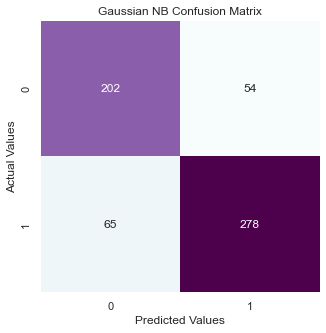

In [19]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

Need better Sampling Methods with low bias to categorize dataset